<a href="https://colab.research.google.com/github/AmmarSahyoun/AI-ProjektSubmission/blob/master/Forestfire_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Forest fires help in the natural cycle of woods' growth and replenishment.
### But when fires burn too hot and uncontrollable or when they’re in the “wildland-urban interface”,  they can be damaging and life-threatening.


### Our dataset consists of 517 examples, (11 numeric features, 2 categorical features) with no missing data. It shows forest fire In the northeast region of Portugal. Based on the spatial, temporal, and weather variables where the fire is spotted.

### My focus will be on the features association, which could help to build a model that predicts the fire area and the urgency of the fire situation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('forestfires.csv')
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [3]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Some attributes'have positive skewed' skewed to the right(mean>median) some skewed to the left(mean<median).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Skew: 12.846933533934868
Kurtosis: 194.1407210942299


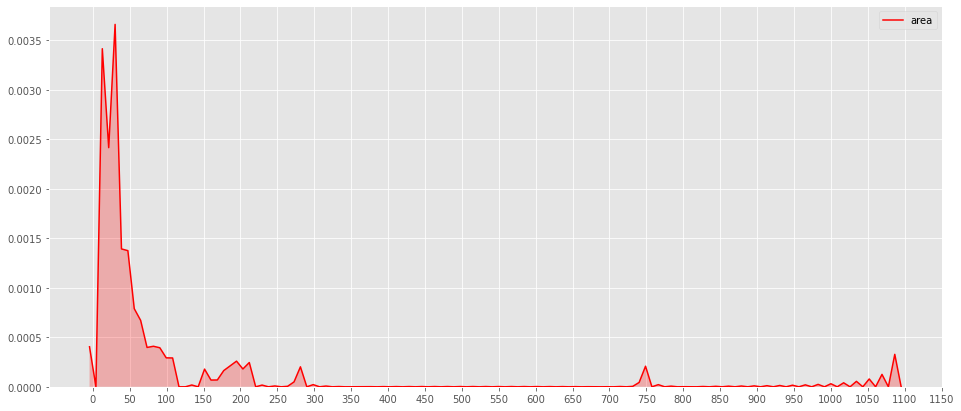

In [5]:
# At the beginnings i will look at the target.
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,7))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='r')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

### from the first look, I can notice that the data has a positive skewness, negative kurtosis values. Most of the dataset's fires samples fall between 0 and 200 of 'Area' with the majority being less than 100 ha and the Most frequented damaged area is under 50 hectares of land. However, there are a few outliers that will put into consideration.

In [6]:
# the Z-score of the input data, relative to the sample mean and std, Which represent the outliers.
from scipy.stats import zscore 
outliers = df[abs(zscore(df['area'])) >= 3 ]
outliers # which will handle them later.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [7]:
dfa = df.drop(columns='area')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

cat_columns, num_columns

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

## Categorical columns

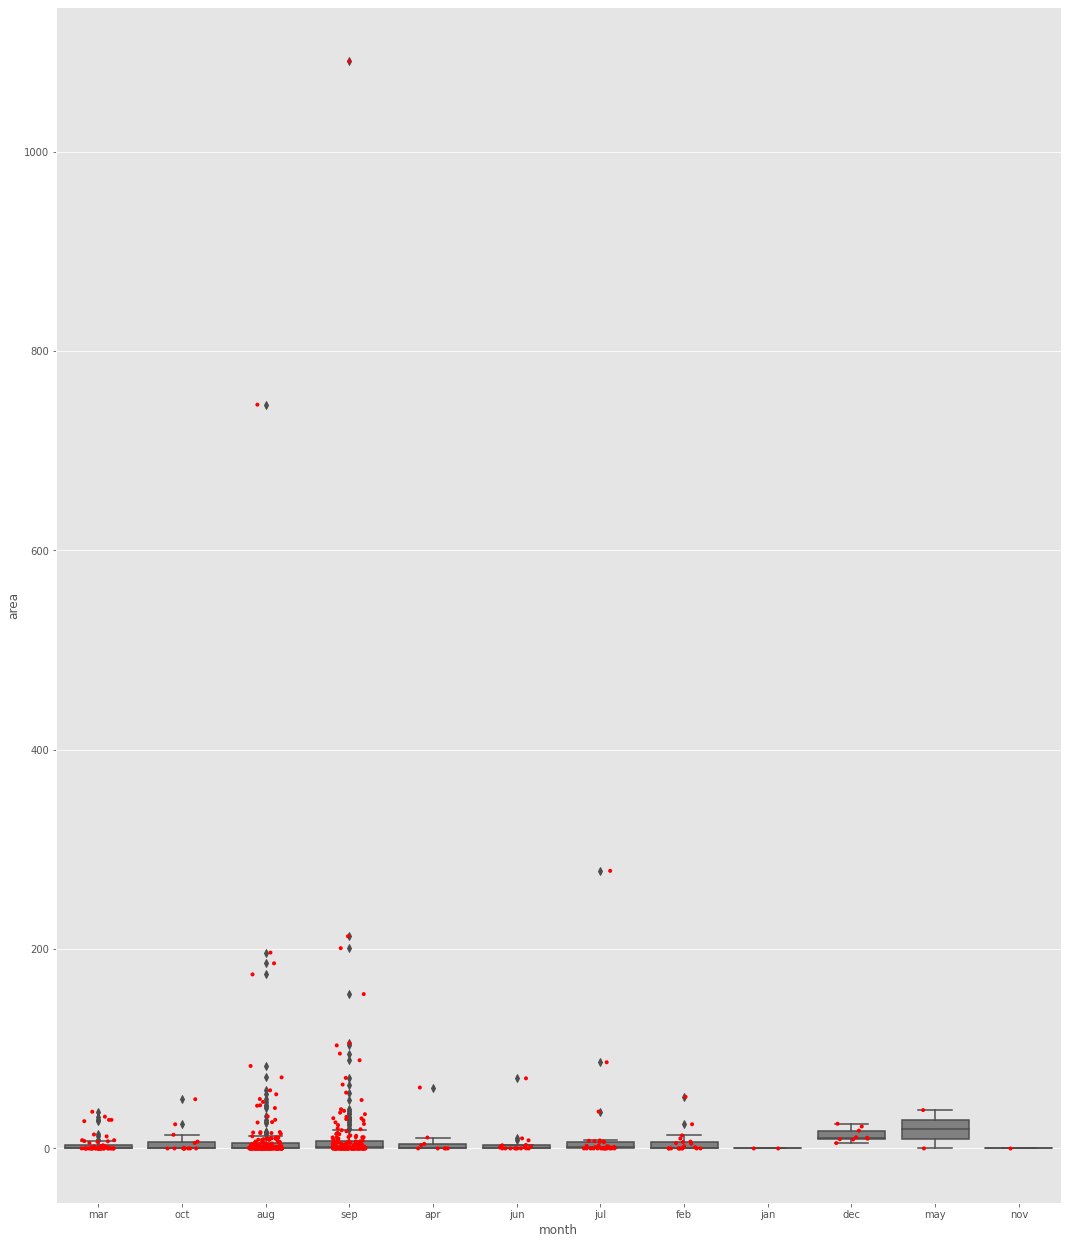

In [8]:
# January and November have the lowest fires, while December has few more incidents.
ax = plt.figure(figsize=(18,22))
ax = sns.boxplot(x='month', y='area', data=df, color='grey', )
ax = sns.stripplot(x='month', y='area', data=df, color='red', jitter=0.2, size=4)

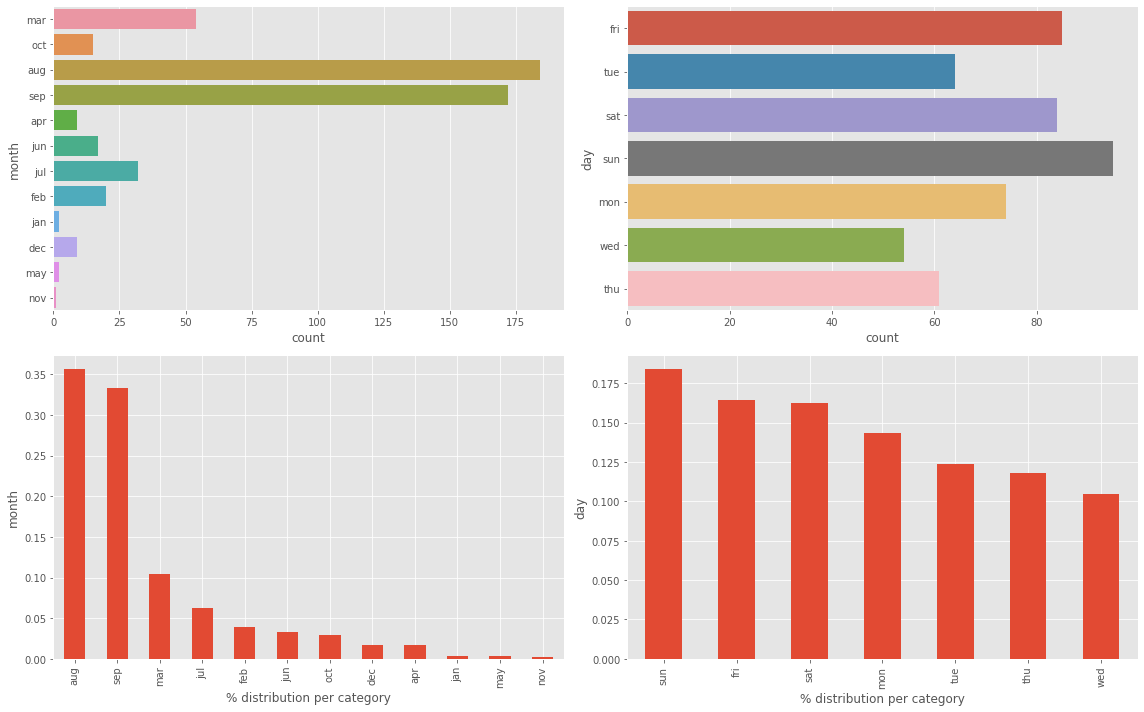

In [9]:
# analyzing categorical columns(month and day)
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()    

### It is clear that a high number of forest fires occur in the month of **August** and **September**. In the case of the days, the **weekends** have a higher proportion of cases.



## Numerical Columns

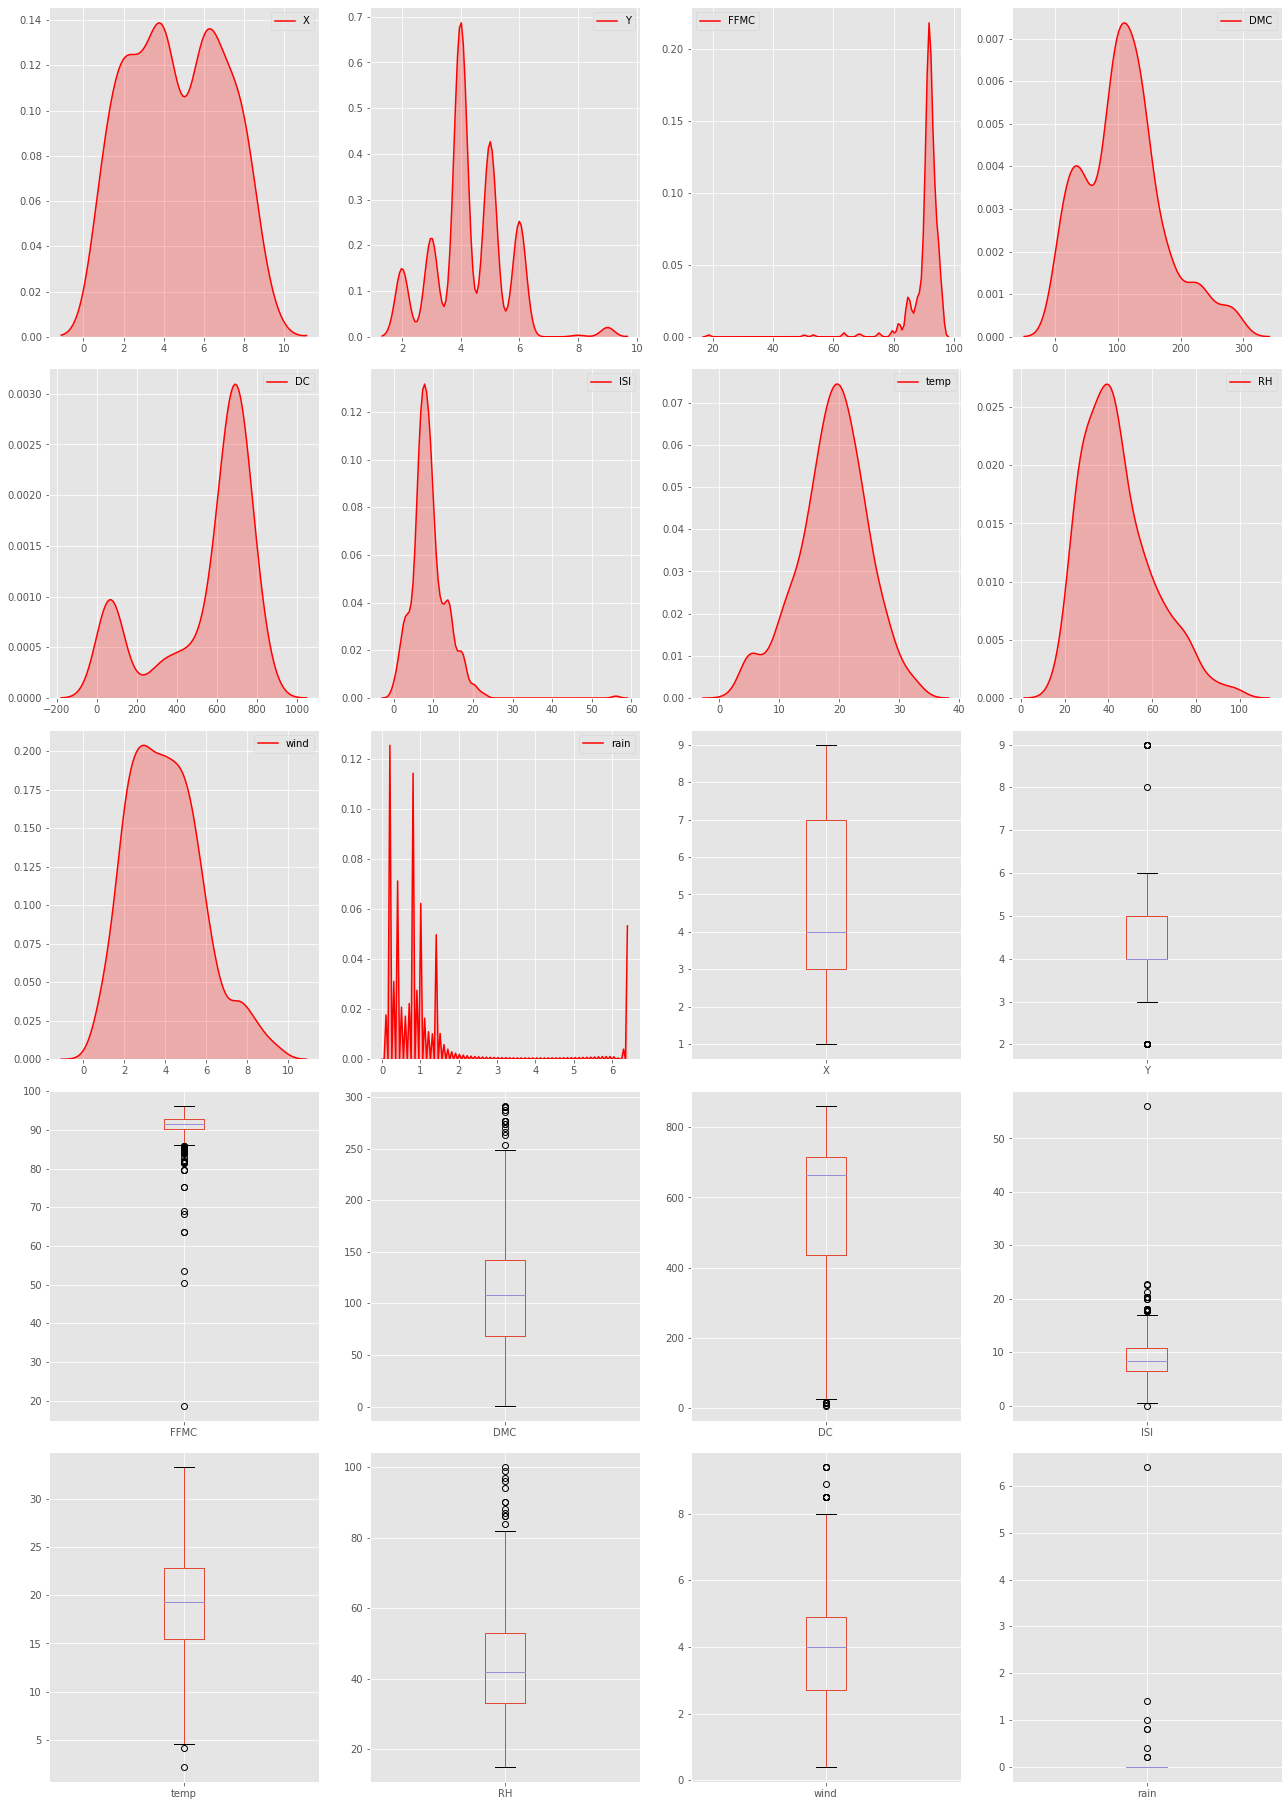

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [10]:
# The best way to visualize numeric data with its outliers is the Boxplot
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='r',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

### Assuming that the temperature, wind, rain, and relative humidity RH might be a great causation indicator for the wildfires. And that's really clear in this histogram.

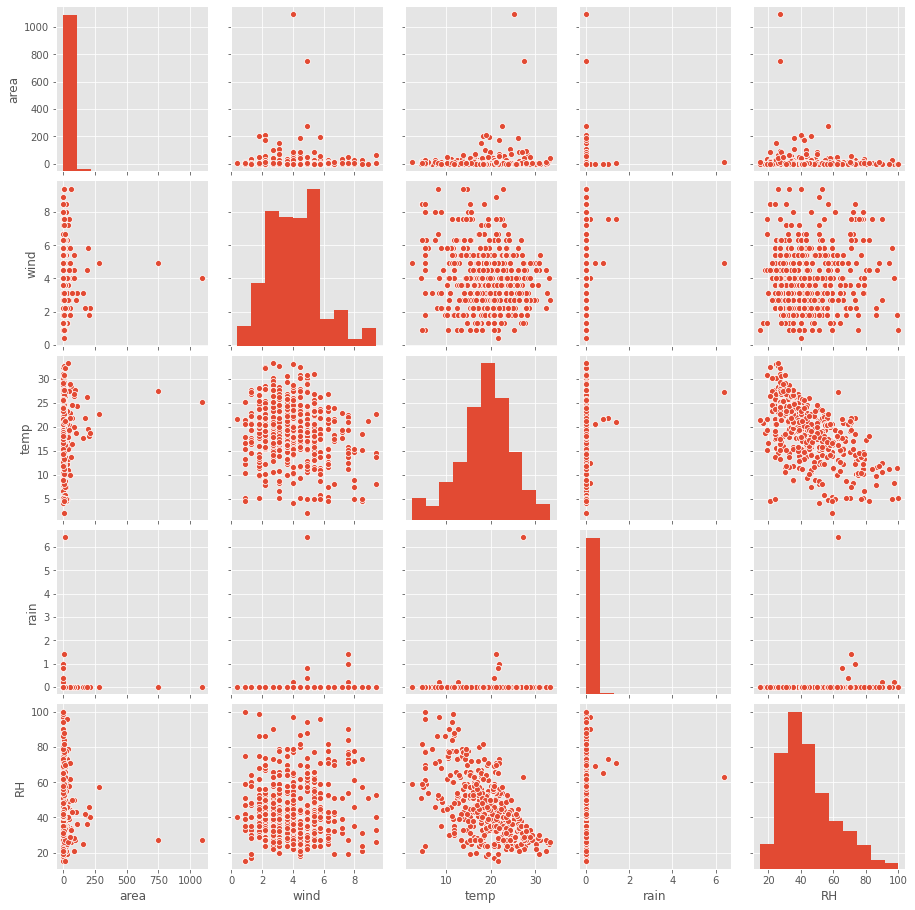

In [11]:
sns.pairplot(df[['area', 'wind', 'temp', 'rain', 'RH']])
plt.show()

# As I aim to predict the urgency of the fire situation depending on the fires area damage, so I need to categories the risk area in a different groups.

In [12]:
# a categorical variable based on fires area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,low
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,low
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,low
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,low
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,low


In [13]:
print('the distribution of the fire area damage in hectare(1hk = 0,01 square kilometer)')
df.groupby('damage_category').area.sum()

the distribution of the fire area damage in hectare(1hk = 0,01 square kilometer)


damage_category
high         1897.27
low            15.45
moderate     1279.06
very high    3450.27
Name: area, dtype: float64

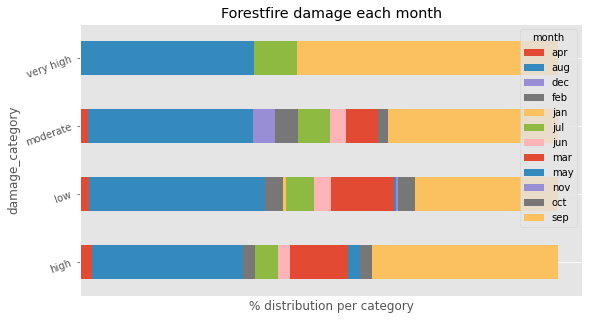

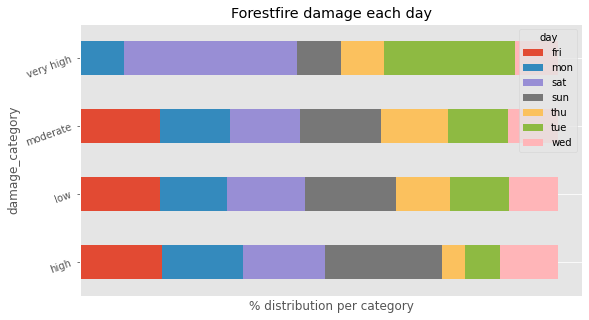

In [14]:
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    #cross.plot.barh(stacked=True,rot=60,cmap='hot')
    cross.plot.barh(stacked=True,rot=20)
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(6,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

### I can notice that most fires in August were for less than 1 hectare.
### The very high damages which are more than 100 hectares, happened in only 3 months: august, July and September.
### Regarding fire damage per day, most reporting was on Saturdays.


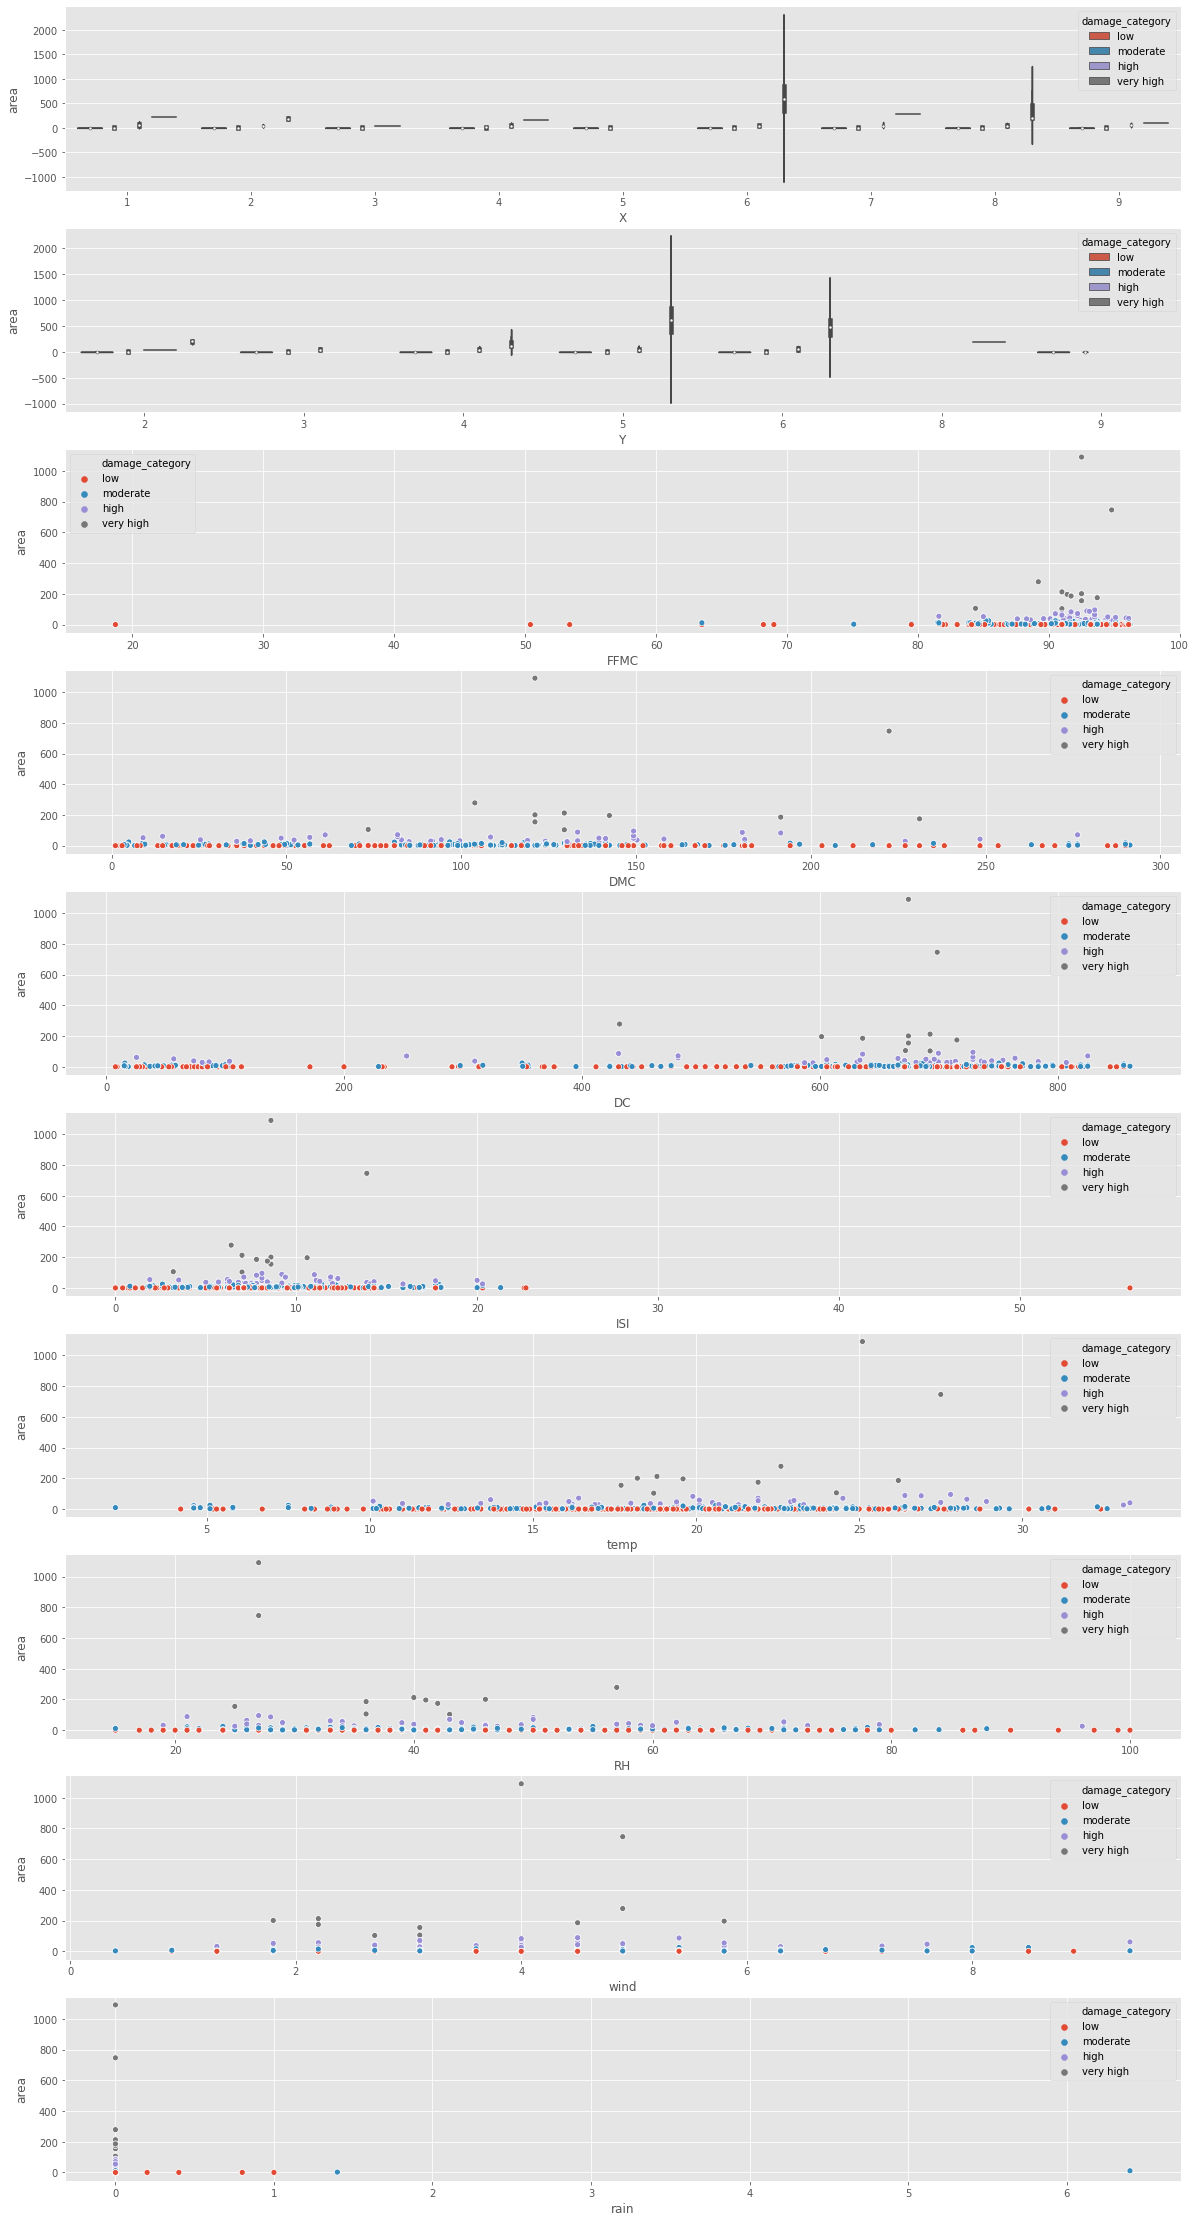

In [15]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.violinplot(x=col,y='area',hue='damage_category', data=df)
    else:
        sns.scatterplot(x=col,y='area',hue='damage_category', data=df)
plt.show()


# Data Preprocessing

In [16]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [17]:
out_columns = ['area','FFMC','ISI','rain'] # these columns that have high  skewness and kurtosis
np.log1p(df[out_columns]).skew()

area     1.217838
FFMC   -11.675394
ISI     -0.937218
rain    14.173028
dtype: float64

In [18]:
np.log1p(df[out_columns]).kurtosis()

area      0.945668
FFMC    185.482383
ISI       2.584588
rain    234.240025
dtype: float64

In [19]:
# We still have high skewness, I will use zscore method.
zscored = df.loc[:,['FFMC']].apply(zscore).abs() < 3

In [20]:
df = df[zscored.values]
df.shape

(510, 14)

In [21]:
# Since most of the values in rain are 0.0, we can convert it as a categorical column
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))
out_columns.remove('rain')

In [22]:
# Apply the Algorithm method to optimize the value of the skews.
df[out_columns] = np.log1p(df[out_columns])

In [23]:
df[out_columns].skew()

area    1.208492
FFMC   -1.803993
ISI    -0.434372
dtype: float64

In [24]:
df[out_columns].kurtosis() 

area    0.923414
FFMC    4.866747
ISI     1.122574
dtype: float64

In [25]:
df.describe() # I need to encode the month and day columns.

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,4.680392,4.294118,4.522609,111.837647,550.470392,2.228457,18.951569,44.029412,4.017255,0.015686,1.121351
std,2.320534,1.234636,0.034979,63.853719,246.630662,0.428759,5.789930,15.968323,1.788793,0.124381,1.401431
min,1.000000,2.000000,4.332048,3.000000,7.900000,0.741937,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,4.514151,73.250000,442.300000,2.041220,15.625000,32.250000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,4.528829,108.400000,664.200000,2.240710,19.300000,41.500000,4.000000,0.000000,0.457245
75%,7.000000,5.000000,4.542230,142.400000,714.200000,2.484907,22.800000,53.000000,4.900000,0.000000,2.025183
max,9.000000,9.000000,4.576771,291.300000,860.600000,4.044804,33.300000,99.000000,9.400000,1.000000,6.995620


In [26]:
from sklearn.preprocessing import LabelEncoder # my favorite categorical encoder 
le = LabelEncoder() 
  
df['day']= le.fit_transform(df['day']) 
df['month']= le.fit_transform(df['month']) 
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,7,0,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0,0.0,low
1,7,4,10,5,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0,0.0,low
2,7,4,10,2,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0,0.0,low
3,8,6,7,0,4.529368,33.3,77.5,2.302585,8.3,97,4.0,1,0.0,low
4,8,6,7,3,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0,0.0,low


In [27]:
X = df.iloc[:, :-2].values
y = df['area'].values
X

array([[ 7. ,  5. ,  7. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  1. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  1. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. ,  9. , ..., 31. ,  4.5,  0. ]])

In [28]:
y[-6:-1] # Now the data set is ready to enter the Surgical operating room :)

array([0.        , 2.00687085, 4.01259206, 2.49815188, 0.        ])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [30]:
from sklearn.preprocessing import StandardScaler # Apply Standardization to the independent variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error
print("Linear Regression")
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Linear Regression


In [32]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.78 0.  ]
 [1.14 2.12]
 [1.03 0.  ]
 [1.35 3.9 ]
 [0.77 0.  ]
 [1.44 1.31]
 [1.11 4.08]
 [0.78 2.27]
 [0.83 2.83]
 [0.82 2.4 ]
 [0.74 0.  ]
 [0.77 5.31]
 [1.22 0.  ]
 [1.13 0.78]
 [1.18 0.  ]
 [1.05 0.  ]
 [1.23 0.  ]
 [0.73 0.  ]
 [1.08 0.  ]
 [1.   0.  ]
 [0.98 0.  ]
 [1.23 2.01]
 [0.73 2.02]
 [1.28 1.56]
 [1.42 0.75]
 [1.17 1.08]
 [0.72 0.  ]
 [1.81 0.  ]
 [1.07 1.  ]
 [1.53 6.62]
 [1.03 0.  ]
 [0.94 2.75]
 [1.33 0.  ]
 [0.87 0.  ]
 [0.81 1.71]
 [1.05 4.43]
 [1.16 0.64]
 [1.55 0.31]
 [1.47 0.  ]
 [0.91 0.  ]
 [0.73 0.  ]
 [1.71 0.  ]
 [1.13 4.04]
 [0.72 0.  ]
 [1.35 4.18]
 [1.08 2.06]
 [1.91 2.49]
 [1.48 2.96]
 [0.94 0.  ]
 [1.37 3.01]
 [0.96 0.  ]
 [1.06 2.11]
 [0.13 0.  ]
 [0.97 0.  ]
 [1.24 0.  ]
 [1.12 2.64]
 [0.91 1.6 ]
 [0.97 0.  ]
 [0.89 1.92]
 [1.29 0.  ]
 [1.16 0.58]
 [1.21 0.  ]
 [1.03 3.44]
 [1.24 0.09]
 [0.7  1.12]
 [1.78 0.  ]
 [1.06 0.  ]
 [0.96 5.37]
 [0.93 0.  ]
 [1.65 4.47]
 [1.37 1.26]
 [0.41 1.15]
 [0.87 2.23]
 [1.06 0.  ]
 [1.01 0.  ]
 [0.85 0.  ]
 [1.28 5.63]

In [33]:
from sklearn.metrics import r2_score # best possible score is 1.0
r2_score(y_test, y_pred)

-0.009707069038159988

Text(0.5, 1.0, 'Predicted vs True values using LinearRegression')

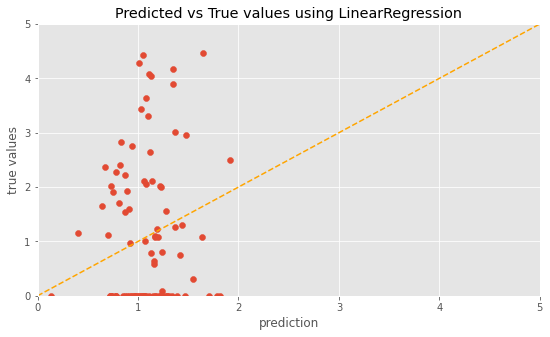

In [34]:
# 
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(0,200,200), np.linspace(0,200,200), c = 'orange', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,5)
plt.ylim(0,5)
plt.title('Predicted vs True values using LinearRegression')

# ANN

In [35]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [36]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu')) #Ann input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu')) #the second ANN layer
ann.add(tf.keras.layers.Dense(units=1,activation=None)) #the output layers
ann.compile(optimizer='adam', loss='mean_squared_error') #Training the ANN

In [37]:
# Training the ANN model on the training set 
ann.fit(x=X_train,y=y_train, batch_size=32, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 2.9660
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 2.6438
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 2.4480
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 2.3306
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 2.2306
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 2.1613
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 2.1078
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 2.0616
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 2.0210
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 1.9910
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 1.9596
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 1.9306
Epoch 13/100
13/13 [=================

In [38]:
ann.summary() # Summaru that show how many parameters in the ANN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 78        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [39]:
Ann_y_pred=ann.predict(X_test) #predict the result 

In [40]:
r2_score(y_test, Ann_y_pred)

-0.04863880684827726

In [41]:
# compare the real results withe the predict one
np.set_printoptions(precision=2)
print(np.concatenate((Ann_y_pred.reshape(len(Ann_y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.75 0.  ]
 [1.13 2.12]
 [0.95 0.  ]
 [1.5  3.9 ]
 [1.1  0.  ]
 [1.3  1.31]
 [0.83 4.08]
 [1.08 2.27]
 [0.74 2.83]
 [0.68 2.4 ]
 [0.41 0.  ]
 [1.08 5.31]
 [0.96 0.  ]
 [0.88 0.78]
 [1.15 0.  ]
 [1.62 0.  ]
 [1.   0.  ]
 [0.93 0.  ]
 [1.06 0.  ]
 [0.51 0.  ]
 [1.6  0.  ]
 [1.05 2.01]
 [0.74 2.02]
 [1.39 1.56]
 [1.78 0.75]
 [1.68 1.08]
 [1.23 0.  ]
 [2.8  0.  ]
 [0.97 1.  ]
 [1.62 6.62]
 [1.19 0.  ]
 [1.38 2.75]
 [1.46 0.  ]
 [0.7  0.  ]
 [0.55 1.71]
 [0.7  4.43]
 [0.89 0.64]
 [1.59 0.31]
 [1.82 0.  ]
 [0.89 0.  ]
 [0.66 0.  ]
 [2.5  0.  ]
 [0.9  4.04]
 [0.49 0.  ]
 [1.72 4.18]
 [0.93 2.06]
 [2.05 2.49]
 [1.49 2.96]
 [1.68 0.  ]
 [1.28 3.01]
 [1.38 0.  ]
 [1.16 2.11]
 [0.18 0.  ]
 [0.88 0.  ]
 [1.05 0.  ]
 [1.13 2.64]
 [0.9  1.6 ]
 [1.19 0.  ]
 [1.24 1.92]
 [1.41 0.  ]
 [0.88 0.58]
 [0.58 0.  ]
 [0.88 3.44]
 [0.82 0.09]
 [1.16 1.12]
 [1.77 0.  ]
 [0.74 0.  ]
 [1.17 5.37]
 [0.48 0.  ]
 [1.7  4.47]
 [0.87 1.26]
 [0.18 1.15]
 [0.44 2.23]
 [0.64 0.  ]
 [1.68 0.  ]
 [1.   0.  ]
 [1.35 5.63]

Text(0.5, 1.0, 'Predicted vs True values using ANN')

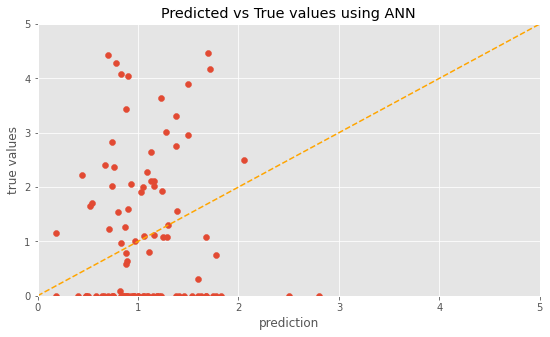

In [42]:
# We see that the model performs not bad. Ideally the dots should be near the line.
plt.scatter(Ann_y_pred, y_test)
plt.plot(np.linspace(0,200,200), np.linspace(0,200,200), c = 'orange', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,5)
plt.ylim(0,5)
plt.title('Predicted vs True values using ANN')

### I've got Better result with ANN

In [43]:
# we have a bad result with LinearRegression
high = df['damage_category'] == "high"
low = df['damage_category'] == "low"
moderate = df['damage_category'] == "moderate"
veryhigh = df['damage_category'] == "very high"


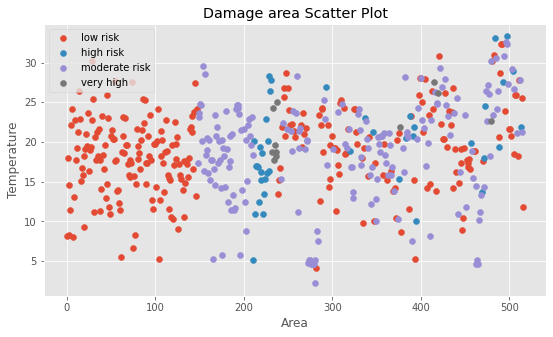

In [44]:
plt.scatter(df[low].index, df[low].temp, label ='low risk')
plt.scatter(df[high].index, df[high].temp, label ='high risk')
plt.scatter(df[moderate].index, df[moderate].temp, label = 'moderate risk')
plt.scatter(df[veryhigh].index, df[veryhigh].temp, label = 'very high')
plt.grid(True)
plt.xlabel('Area') 
plt.ylabel('Temperature')
plt.title('Damage area Scatter Plot')
plt.legend()
# show the relation between the temperature and the damage area classes


# Conclusion:
### In this kernel, I analysis the numeric and categorical features Each separately, handle issues like outliers and improve the skewness, I also used Standardization and Cross validation methods and solve the Nominal encoding for month and day in the data set.
###Moreover I even categories the damage area to 4 risk groups.

###the result was not bad, i think this happens because most of the records in the dataset have zero value of the target variable, besides the samples where 500 so it is not enough for the model to learn well,

###The best model was ANN(6, 6, 1) indeed with a better plot.
## [UCI Dataset ](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)
    